In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [19]:
!pwd

/Users/sophiebekerman/ECE_GDL/ProtWaveVAE


In [17]:
df = pd.read_csv("../../ProtWaveVAE/Pfam_analysis/outputs/prediction/pfam/DHFR/DHFR_train_dataset_inference_new.csv")
z_columns = ['z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5']
df = df[df['Taxonomy'].str.split().str.len() > 1]
df["phylum"] = df['Taxonomy'].apply(lambda x: x.split()[1])
df = df[df['phylum'].str.contains('Pseudomonadota|Bacteroidota|Bacillota', regex=True)].copy()

df

,Unnamed: 0,Protein ID,Protein Info,Organism,Taxonomy,Unaligned_Sequence,z_0,z_1,z_2,z_3,z_4,z_5,z_0_mode,z_1_mode,z_2_mode,z_3_mode,z_4_mode,z_5_mode,phylum
0,0,A0A0H2YWF8_ECOK1,"dihydrofolate reductase,EC=1.5.1.3",Escherichia coli O1:K1 / APEC,Bacteria Pseudomonadota Gammaproteobacteria En...,MRRVQGESVDSPAEYKIFLNIILAPVDDGLRFTYSGDNFFYREISM...,-0.469701,0.314441,-1.610511,0.083263,1.810159,-0.113636,-0.918545,0.137044,-1.881384,-0.522017,1.130787,-0.516240,Pseudomonadota
1,1,A0A0H3EEX3_ECO8N,"dihydrofolate reductase,EC=1.5.1.3",Escherichia coli O83:H1 (strain NRG 857C / AIEC),Bacteria Pseudomonadota Gammaproteobacteria En...,MDSPAEYKIFLNIILAPVDDGLRFTYSGDNFFYREISMISLIAALA...,-0.946603,0.930108,-0.180113,-0.204769,-1.170636,-0.577161,-0.998326,0.076319,-0.616529,-0.886689,-1.391658,-1.109064,Pseudomonadota
2,2,A0A140NDR3_ECOBD,"dihydrofolate reductase,EC=1.5.1.3",Escherichia coli (strain B / BL21-DE3),Bacteria Pseudomonadota Gammaproteobacteria En...,MDSPAEYKIFLNIILAPVDDGLRFTYSGDNFFYREISMISLIAALA...,-0.227958,0.436709,-0.162897,-0.519787,-1.235767,-1.018094,-0.998326,0.076319,-0.616529,-0.886689,-1.391658,-1.109064,Pseudomonadota
3,3,A0A7M4BLF3_ECOHS,"Dihydrofolate reductase,EC=1.5.1.3",Escherichia coli O9:H4 (strain HS),Bacteria Pseudomonadota Gammaproteobacteria En...,MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,-0.653753,-0.253226,-1.934173,-0.704849,3.413163,0.835783,-0.967677,-0.557249,-2.288762,-1.001275,2.478421,0.024735,Pseudomonadota
4,4,B2U256_SHIB3,"Dihydrofolate reductase,EC=1.5.1.3",Shigella boydii serotype 18 (strain CDC 3083-9...,Bacteria Pseudomonadota Gammaproteobacteria En...,MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHT...,-0.345832,-0.190421,-1.809866,-0.424409,3.920516,0.462822,-0.967677,-0.557249,-2.288762,-1.001275,2.478421,0.024735,Pseudomonadota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1764,1792,A0A0F5Q3T6_9HYPH,"Dihydrofolate reductase,EC=1.5.1.3",Devosia epidermidihirudinis,Bacteria Pseudomonadota Alphaproteobacteria Hy...,MSIKIAMIAGVAENGVIGSSQTIPWRIPSDFGFFKRTTMGKPMIMG...,0.107654,0.057651,0.431015,-0.004324,-0.001357,0.566369,0.067311,-0.017089,-0.085005,-0.124652,-0.050280,0.014976,Pseudomonadota
1765,1793,A0A7X3GZE9_9GAMM,"Dihydrofolate reductase,EC=1.5.1.3",Halomonas zhuhanensis,Bacteria Pseudomonadota Gammaproteobacteria Oc...,MTASETLVPVAMIVAMSKNRVIGVEGKLPWYLPEDLKFFKRITQAK...,0.501494,0.397244,0.776184,-0.041728,0.682956,0.327257,0.166931,0.020248,-0.052816,-0.170556,-0.174661,0.052989,Pseudomonadota
1766,1794,A0A1I2EP21_9BACI,"Dihydrofolate reductase,EC=1.5.1.3",Alteribacillus iranensis,Bacteria Bacillota Bacilli Bacillales Bacillac...,MISFIAAMDENRVIGKDNQLPWYLPADLKHFKSVTNGHPIVMGRKT...,1.059716,-0.664640,-1.444068,1.468663,0.246726,-2.168104,0.423002,-1.358224,-1.939421,0.482479,-0.286166,-2.271600,Bacillota
1767,1795,A0A916DVL2_9BACT,"Dihydrofolate reductase,EC=1.5.1.3",Aureispira anguillae,Bacteria Bacteroidota Saprospiria Saprospirale...,MRVSTIVGMGNHNEIGKGNDIPWYLPADLKYFKKITSGHPIIMGRK...,-1.779322,0.113887,-2.073155,-1.449845,-0.323375,0.487770,-1.991075,-0.106200,-2.222920,-1.974729,-0.894829,-0.415493,Bacteroidota


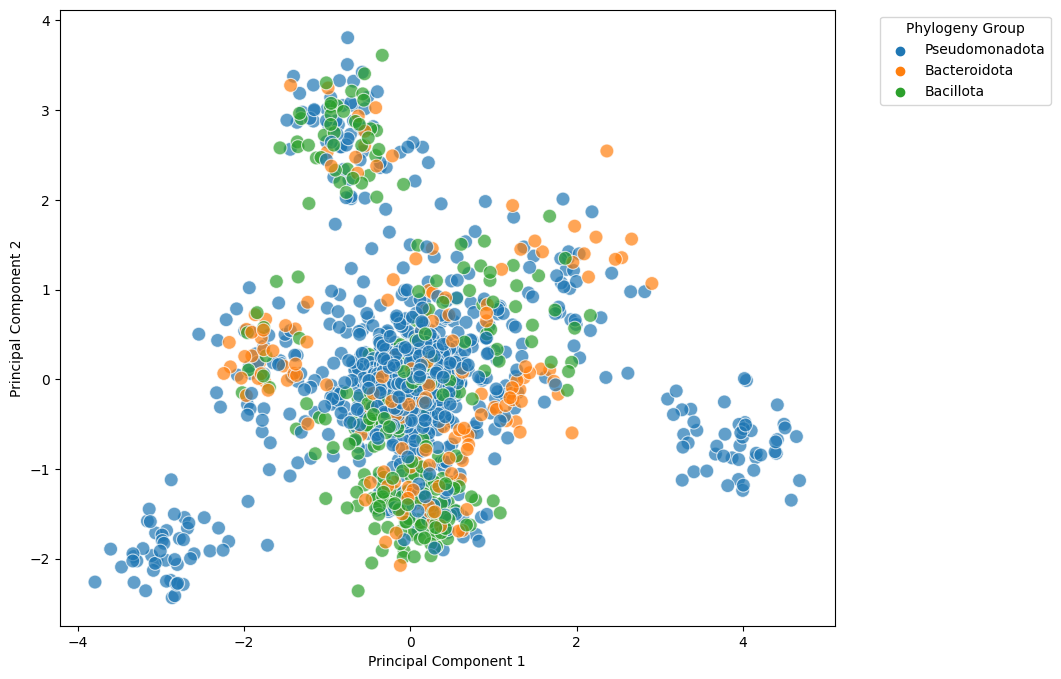

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[z_columns])
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue = "phylum", palette='tab10', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Phylogeny Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()